In [154]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,recall_score,precision_score,confusion_matrix

In [155]:
data=pd.read_csv('brain_stroke.csv')

In [156]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [157]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


In [5]:
data.shape

(4981, 11)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [7]:
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


In [8]:
data.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [9]:
data['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [10]:
data['ever_married'].unique()

array(['Yes', 'No'], dtype=object)

In [11]:
data['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children'], dtype=object)

In [12]:
data['Residence_type'].unique()

array(['Urban', 'Rural'], dtype=object)

In [13]:
data['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [14]:
data['heart_disease'].unique()

array([1, 0], dtype=int64)

In [15]:
data['hypertension'].unique()

array([0, 1], dtype=int64)

In [16]:
data['gender'].value_counts()

Female    2907
Male      2074
Name: gender, dtype: int64

In [17]:
data['ever_married'].value_counts()

Yes    3280
No     1701
Name: ever_married, dtype: int64

In [18]:
data['work_type'].value_counts()

Private          2860
Self-employed     804
children          673
Govt_job          644
Name: work_type, dtype: int64

In [19]:
data['Residence_type'].value_counts()

Urban    2532
Rural    2449
Name: Residence_type, dtype: int64

In [20]:
data['smoking_status'].value_counts()

never smoked       1838
Unknown            1500
formerly smoked     867
smokes              776
Name: smoking_status, dtype: int64

In [21]:
data['hypertension'].value_counts()

0    4502
1     479
Name: hypertension, dtype: int64

In [22]:
data['heart_disease'].value_counts()

0    4706
1     275
Name: heart_disease, dtype: int64

In [23]:
data['stroke'].value_counts()

0    4733
1     248
Name: stroke, dtype: int64

## Convert categorical columns into numerical columns

In [24]:
# data.info()

In [25]:
# encoded_data=pd.get_dummies(data,columns=['gender','ever_married','work_type','Residence_type','smoking_status'])

In [26]:
# ['age','hypertension','heart_disease','avg_glucose_level','bmi','stroke','gender_Female','gender_Male','ever_married_No','ever_married_Yes'
# 'work_type_Govt_job','work_type_Private','work_type_Self-employed','work_type_children','Residence_type_Rural','Residence_type_Urban',
# 'smoking_status_Unknown','smoking_status_formerly smoked','smoking_status_never smoked','smoking_status_smokes']

In [27]:
# encoded_data.head()

In [28]:
# encoded_data.shape

In [29]:
# encoded_data.info()

## Label Encoder

In [30]:
df=data

In [31]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [32]:
# Converting object columns to numeric - "LabelEncoder"

from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

objList = df.select_dtypes(include = "object").columns

for obj in objList:
    df[obj] = lb.fit_transform(df[obj].astype(str))


In [33]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,1,1,228.69,36.6,1,1
1,1,80.0,0,1,1,1,0,105.92,32.5,2,1
2,0,49.0,0,0,1,1,1,171.23,34.4,3,1
3,0,79.0,1,0,1,2,0,174.12,24.0,2,1
4,1,81.0,0,0,1,1,1,186.21,29.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,1,41.0,0,0,0,1,0,70.15,29.8,1,0
4977,1,40.0,0,0,1,1,1,191.15,31.1,3,0
4978,0,45.0,1,0,1,0,0,95.02,31.8,3,0
4979,1,40.0,0,0,1,1,0,83.94,30.0,3,0


In [153]:
lb.classes_
# index of labels is their encoded classes

array(['Unknown', 'formerly smoked', 'never smoked', 'smokes'],
      dtype=object)

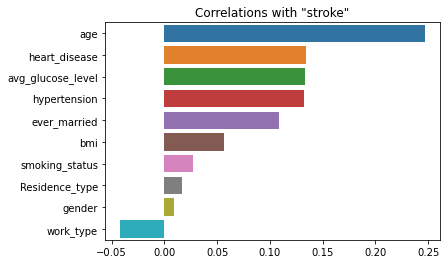

In [34]:
# Correlations with "stroke"

limit = -1.0

data1 = df.corr()["stroke"].sort_values(ascending=False)
indices = data1.index
labels = []
corr = []
for i in range(1, len(indices)):
    if data1[indices[i]]>limit:
        labels.append(indices[i])
        corr.append(data1[i])
sns.barplot(x=corr, y=labels)
plt.title('Correlations with "stroke"')
plt.show()


## Handling unbalanced data by using smote that create synthetic minority values and split data 

In [35]:
df['stroke'].value_counts()

0    4733
1     248
Name: stroke, dtype: int64

In [36]:
x=data.drop('stroke',axis=1)

In [37]:
y=data['stroke']

In [39]:
# smote oversample minority classes
# from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x,y=smote.fit_resample(x,y)

In [40]:
df['stroke'].value_counts()

0    4733
1     248
Name: stroke, dtype: int64

In [41]:
y.value_counts()

1    4733
0    4733
Name: stroke, dtype: int64

In [42]:
os_data = pd.concat([pd.DataFrame(x), pd.DataFrame(y)], axis=1)

In [43]:
os_data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.000000,0,1,1,1,1,228.690000,36.600000,1,1
1,1,80.000000,0,1,1,1,0,105.920000,32.500000,2,1
2,0,49.000000,0,0,1,1,1,171.230000,34.400000,3,1
3,0,79.000000,1,0,1,2,0,174.120000,24.000000,2,1
4,1,81.000000,0,0,1,1,1,186.210000,29.000000,1,1
...,...,...,...,...,...,...,...,...,...,...,...
9461,0,77.391572,0,0,0,1,1,204.907369,42.414491,1,1
9462,0,62.404787,0,0,1,0,0,204.646160,41.247659,1,1
9463,0,50.539588,0,0,1,1,0,72.915602,30.057185,1,1
9464,0,59.000000,0,0,1,1,0,114.263766,27.104651,2,1


In [149]:
os_data['gender'].value_counts()

0    6378
1    3088
Name: gender, dtype: int64

In [44]:
sum(y)/len(y)

0.5

In [45]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=10,stratify=y)

In [46]:
print("Train data shape: ",x_train.shape)
print("Test data shape: ",x_test.shape)

Train data shape:  (7099, 10)
Test data shape:  (2367, 10)


In [47]:
x_train

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
3220,0,24.000000,0,0,1,1,0,76.420000,24.800000,3
7812,0,80.000000,0,0,1,1,1,72.778097,37.507399,2
943,1,41.000000,1,0,1,1,1,69.520000,31.900000,2
1406,0,44.000000,0,0,0,1,1,76.300000,30.500000,2
6248,0,52.193582,1,0,1,0,0,71.371862,31.114759,1
...,...,...,...,...,...,...,...,...,...,...
8996,0,73.376527,0,0,1,1,1,71.700585,33.232766,2
7858,1,50.348261,0,0,0,1,0,109.781153,39.045784,1
4617,0,62.000000,0,0,1,1,1,74.120000,21.800000,1
441,0,15.000000,0,0,0,3,0,114.530000,29.100000,0


In [48]:
y_train

3220    0
7812    1
943     0
1406    0
6248    1
       ..
8996    1
7858    1
4617    0
441     0
35      1
Name: stroke, Length: 7099, dtype: int64

In [49]:
x_test

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
7481,0,58.086728,0,0,1,1,1,107.587831,38.027597,1
3161,1,47.000000,0,0,1,1,0,91.050000,31.100000,1
2407,0,51.000000,0,0,1,2,1,219.920000,33.500000,1
4,1,81.000000,0,0,1,1,1,186.210000,29.000000,1
7596,0,58.591209,0,0,0,1,0,91.614945,33.714505,0
...,...,...,...,...,...,...,...,...,...,...
2675,1,24.000000,0,0,0,1,0,93.760000,24.000000,1
4048,0,57.000000,0,0,1,1,1,73.000000,26.200000,2
4297,1,30.000000,0,0,0,1,1,106.030000,26.700000,0
884,0,71.000000,0,1,1,1,1,170.950000,35.200000,2


In [50]:
y_test

7481    1
3161    0
2407    0
4       1
7596    1
       ..
2675    0
4048    0
4297    0
884     0
599     0
Name: stroke, Length: 2367, dtype: int64

In [51]:
sum(y_test)/len(y_test)

0.5002112378538234

In [52]:
sum(y_train)/len(y_train)

0.4999295675447246

`stratify` worked as expected and both `y_train` and `y_test` have the same percentage of people that stroked. Now let's build the preliminary model.

## Regression

In [53]:
from sklearn.linear_model import LinearRegression
linear_reg=LinearRegression()
linear_reg.fit(x_train,y_train)
y_test_pred=linear_reg.predict(x_test)
y_train_pred=linear_reg.predict(x_train)

In [54]:
print("Score for training data: ",linear_reg.score(x_train,y_train))
print("Score for testing data:",linear_reg.score(x_test,y_test))

Score for training data:  0.4507309395611445
Score for testing data: 0.4278422568315743


In [55]:
from sklearn.metrics import mean_squared_error,r2_score
from math import sqrt
mse=mean_squared_error(y_train,y_train_pred)
rmse=sqrt(mse)
r2score=r2_score(y_train,y_train_pred)
print("------------Train data------------------")
print("MSE for training: ",mse)
print("RMSE for training: ",rmse)
print("r2 Score for training: ",r2score)
mse=mean_squared_error(y_test,y_test_pred)
rmse=sqrt(mse)
r2score=r2_score(y_test,y_test_pred)
print("------------Test data------------------")
print("MSE for testing: ",mse)
print("RMSE for testing: ",rmse)
print("r2 Score for testing: ",r2score)

------------Train data------------------
MSE for training:  0.13731726238493794
RMSE for training:  0.3705634390828889
r2 Score for training:  0.4507309395611445
------------Test data------------------
MSE for testing:  0.14303941026160924
RMSE for testing:  0.3782055132617837
r2 Score for testing:  0.4278422568315743


In [56]:
z=pd.DataFrame(linear_reg.coef_,index=x_train.columns)

In [57]:
z

,0
gender,-0.106280
age,0.013730
hypertension,-0.131073
heart_disease,-0.158312
ever_married,-0.171224
work_type,-0.053753
Residence_type,-0.130384
avg_glucose_level,0.001269
bmi,-0.000094
smoking_status,-0.076222


 ##### Here heartdisease coef is more than 0.05 hence it is less significant

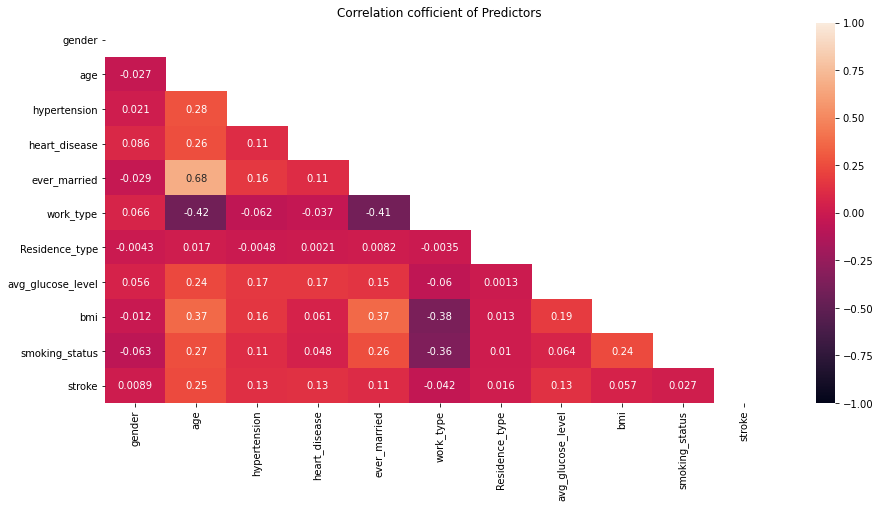

In [58]:
plt.figure(figsize=(15,7))

# generate a mask to onlyshow the bottom triangle
mask=np.triu(np.ones_like(df.corr(),dtype=bool))

sns.heatmap(df.corr(),annot=True,mask=mask,vmin=-1,vmax=1)
plt.title("Correlation cofficient of Predictors")
plt.show()

## Ridgecv

In [59]:
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import RidgeCV
from numpy import arange
rcv=RepeatedKFold(n_splits=10,n_repeats=4,random_state=3)
ridgecv=RidgeCV(alphas=arange(0.1,1,0.01),cv=rcv,scoring='neg_mean_absolute_error')
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.1 , 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 ,
       0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31,
       0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42,
       0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53,
       0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64,
       0.65, 0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75,
       0.76, 0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86,
       0.87, 0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97,
       0.98, 0.99]),
        cv=RepeatedKFold(n_repeats=4, n_splits=10, random_state=3),
        scoring='neg_mean_absolute_error')

In [60]:
ridgecv.alpha_

0.1

In [61]:
ridgecv.score(x_test,y_test)

0.42784082292103054

In [62]:
y_test_pred_ridgecv=ridgecv.predict(x_test)
y_train_pred_ridgecv=ridgecv.predict(x_train)

In [63]:
print("------------------Training Data------------------")
print("MSE: ",mean_squared_error(y_train_pred_ridgecv,y_train))
print("MSE: ",sqrt(mean_squared_error(y_train_pred_ridgecv,y_train)))
print("R2 score: ",r2_score(y_train,y_train_pred_ridgecv))
print("---------------- -Testing Data-------------------")
print("MSE: ",mean_squared_error(y_test_pred_ridgecv,y_test))
print("MSE: ",sqrt(mean_squared_error(y_test_pred_ridgecv,y_test)))
print("R2 score: ",r2_score(y_test,y_test_pred_ridgecv))

------------------Training Data------------------
MSE:  0.13731726259452307
MSE:  0.3705634393656814
R2 score:  0.450730938722804
---------------- -Testing Data-------------------
MSE:  0.1430397687391812
MSE:  0.3782059871805062
R2 score:  0.42784082292103054


## Logistic Regression

In [64]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression(max_iter=500)
log_reg.fit(x_train,y_train)
y_train_pred_log_reg=log_reg.predict(x_train)
y_test_pred_log_reg=log_reg.predict(x_test)

In [65]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score

In [66]:
print("----------------Train Data------------")
print("Accuracy Score is ", accuracy_score(y_train,y_train_pred_log_reg))
print("Precision Score is ", precision_score(y_train,y_train_pred_log_reg))
print("Recall Score is ", recall_score(y_train,y_train_pred_log_reg))

print("----------------Test Data------------")
print("Accuracy Score is ", accuracy_score(y_test,y_test_pred_log_reg))
print("Precision Score is ", precision_score(y_test,y_test_pred_log_reg))
print("Recall Score is ", recall_score(y_test,y_test_pred_log_reg))


----------------Train Data------------
Accuracy Score is  0.8115227496830539
Precision Score is  0.7993501218521527
Recall Score is  0.8317836010143702
----------------Test Data------------
Accuracy Score is  0.8022813688212928
Precision Score is  0.7891760904684976
Recall Score is  0.825168918918919


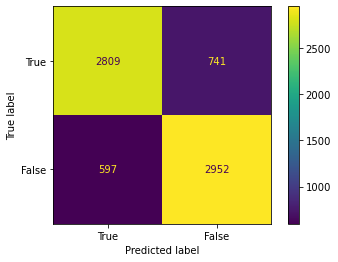

In [67]:
from sklearn import metrics
cm=confusion_matrix(y_train,y_train_pred_log_reg)
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['True','False'])
cm_display.plot()
plt.show()

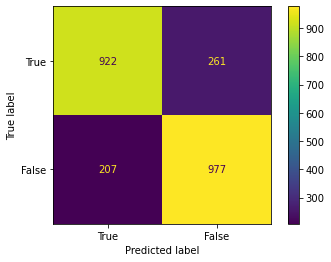

In [68]:
cm=confusion_matrix(y_test,y_test_pred_log_reg)
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['True','False'])
cm_display.plot()
plt.show()

## Decision Tree Classifier

In [69]:
from sklearn.tree import DecisionTreeClassifier
clf_DT=DecisionTreeClassifier(random_state=44)
clf_DT.fit(x_train,y_train)
y_test_pred_clf_DT=clf_DT.predict(x_test)
y_train_pred_clf_DT=clf_DT.predict(x_train)

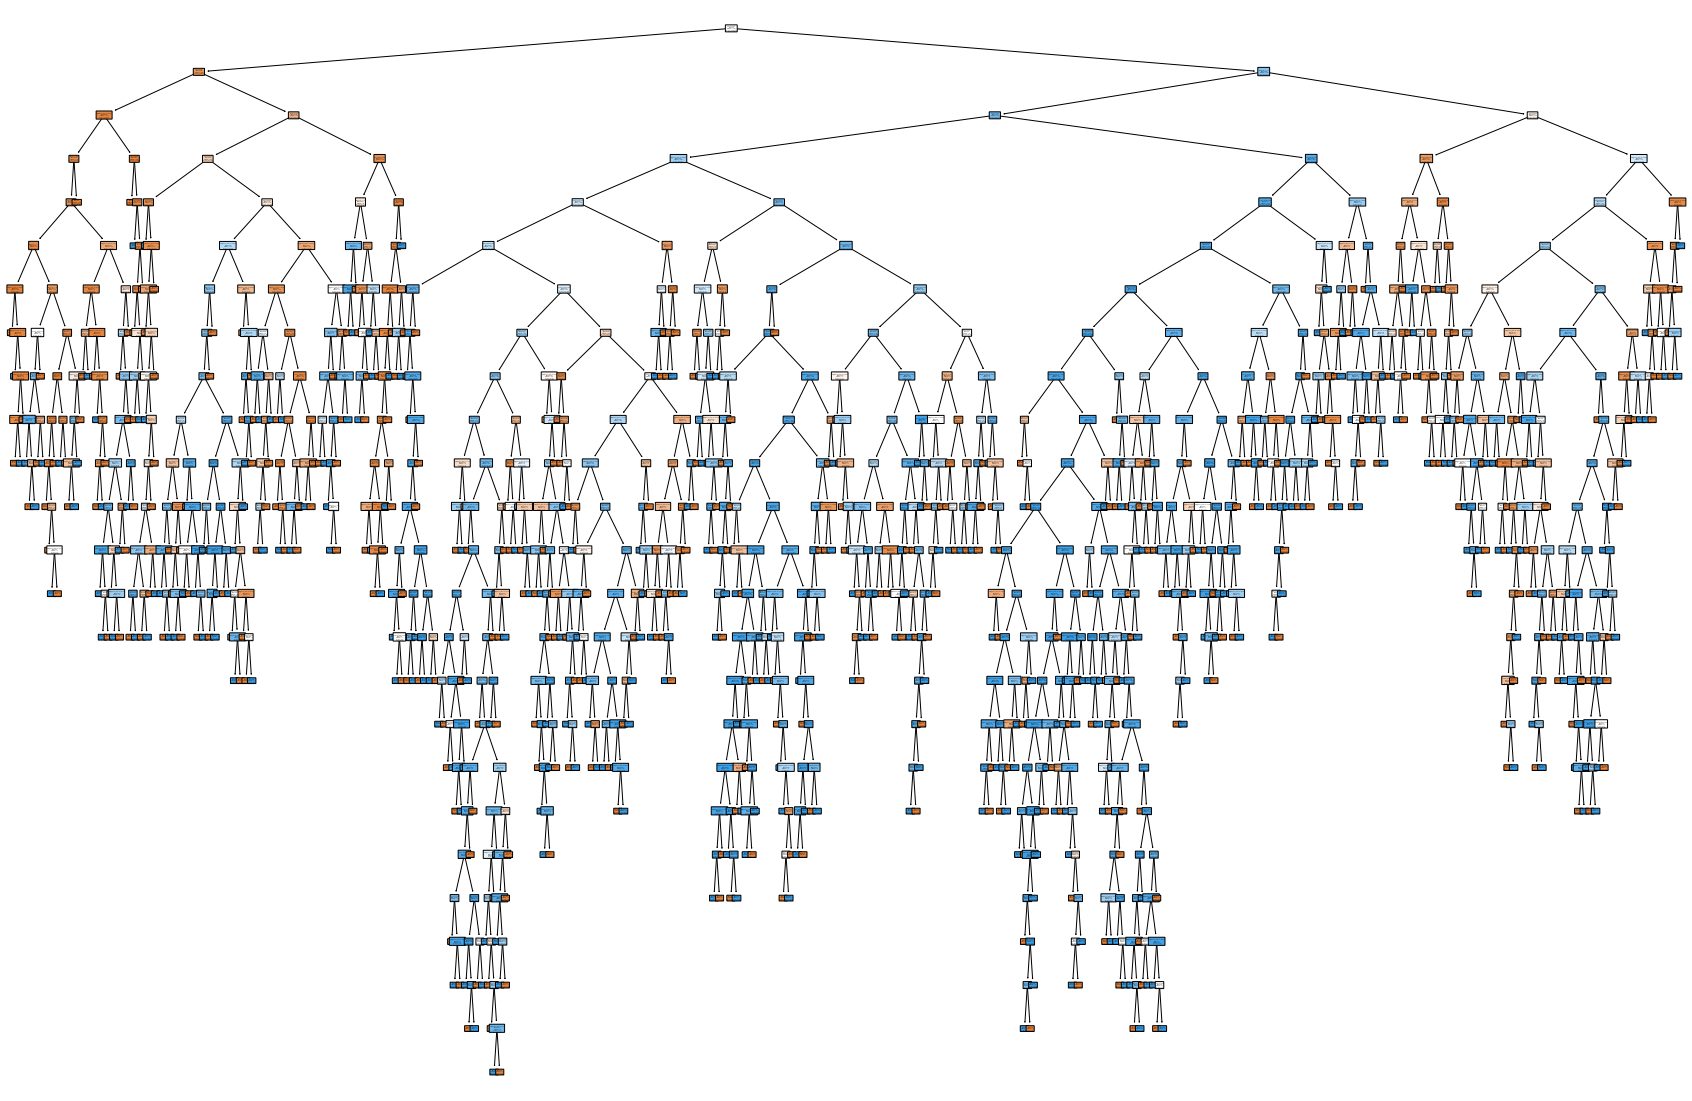

In [70]:
from sklearn.tree import plot_tree
plt.figure(figsize=(30,20))
plot_tree(clf_DT,filled=True,rounded=True,class_names=["No BS"," Yes BS"],feature_names=x_train.columns)
plt.show()

In [71]:
print("----------------Train Data------------")
print("Accuracy Score is ", accuracy_score(y_train,y_train_pred_clf_DT))
print("Precision Score is ", precision_score(y_train,y_train_pred_clf_DT))
print("Recall Score is ", recall_score(y_train,y_train_pred_clf_DT))

print("----------------Test Data------------")
print("Accuracy Score is ", accuracy_score(y_test,y_test_pred_clf_DT))
print("Precision Score is ", precision_score(y_test,y_test_pred_clf_DT))
print("Recall Score is ", recall_score(y_test,y_test_pred_clf_DT))


----------------Train Data------------
Accuracy Score is  1.0
Precision Score is  1.0
Recall Score is  1.0
----------------Test Data------------
Accuracy Score is  0.9011406844106464
Precision Score is  0.890625
Recall Score is  0.9146959459459459


------------CONFUSION MATRIX FOR TRAINING DATA-------------


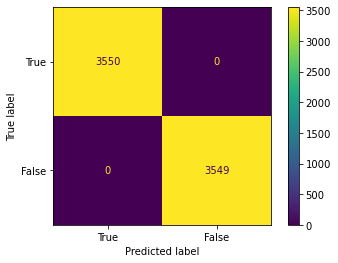

------------CONFUSION MATRIX FOR TESTING DATA-------------


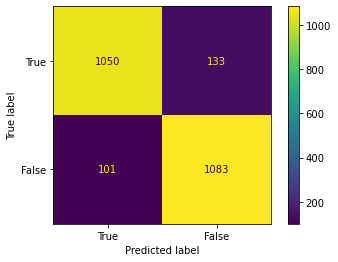

In [72]:
print("------------CONFUSION MATRIX FOR TRAINING DATA-------------")
cm=confusion_matrix(y_train,y_train_pred_clf_DT)
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['True','False'])
cm_display.plot()
plt.show()

print("------------CONFUSION MATRIX FOR TESTING DATA-------------")
cm=confusion_matrix(y_test,y_test_pred_clf_DT)
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['True','False'])
cm_display.plot()
plt.show()

### Tuning using GridSearch

In [73]:
from sklearn.model_selection import GridSearchCV
params={
    'max_depth':[2,3,5,10,20],
    'min_samples_leaf':[5,10,20,50],
    'min_samples_split':[2,5,10,20]
}
grid_search=GridSearchCV(estimator=clf_DT,param_grid=params,cv=4,scoring="accuracy")
grid_search.fit(x_train,y_train)

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=44),
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50],
                         'min_samples_split': [2, 5, 10, 20]},
             scoring='accuracy')

In [74]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=20, min_samples_leaf=5, random_state=44)

In [75]:
grid_search.best_params_

{'max_depth': 20, 'min_samples_leaf': 5, 'min_samples_split': 2}

In [76]:
params_2={
    'max_depth':range(20,30),
    'min_samples_leaf':range(5,15),
    'min_samples_split':range(2,5)  
}
grid_search=GridSearchCV(estimator=clf_DT,param_grid=params_2,cv=4,scoring="accuracy")
grid_search.fit(x_train,y_train)

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=44),
             param_grid={'max_depth': range(20, 30),
                         'min_samples_leaf': range(5, 15),
                         'min_samples_split': range(2, 5)},
             scoring='accuracy')

In [77]:
grid_search.best_params_

{'max_depth': 20, 'min_samples_leaf': 5, 'min_samples_split': 2}

In [78]:
clf_DT_new=DecisionTreeClassifier(max_depth=20, min_samples_leaf=5, min_samples_split=2, random_state=44)
clf_DT_new.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=20, min_samples_leaf=5, random_state=44)

In [79]:
y_test_pred_clf_DT_new=clf_DT_new.predict(x_test)
y_train_pred_clf_DT_new=clf_DT_new.predict(x_train)

In [80]:
print("----------------Train Data------------")
print("Accuracy Score is ", accuracy_score(y_train,y_train_pred_clf_DT_new))
print("Precision Score is ", precision_score(y_train,y_train_pred_clf_DT_new))
print("Recall Score is ", recall_score(y_train,y_train_pred_clf_DT_new))

print("----------------Test Data------------")
print("Accuracy Score is ", accuracy_score(y_test,y_test_pred_clf_DT_new))
print("Precision Score is ", precision_score(y_test,y_test_pred_clf_DT_new))
print("Recall Score is ", recall_score(y_test,y_test_pred_clf_DT_new))


----------------Train Data------------
Accuracy Score is  0.9449218199746443
Precision Score is  0.946045197740113
Recall Score is  0.9436460974922514
----------------Test Data------------
Accuracy Score is  0.8905787917194762
Precision Score is  0.8870292887029289
Recall Score is  0.8952702702702703


------------CONFUSION MATRIX FOR TRAINING DATA-------------


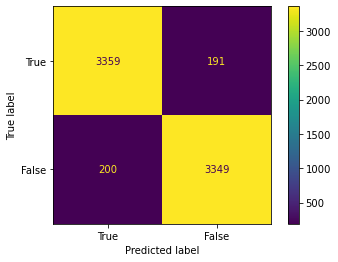

------------CONFUSION MATRIX FOR TESTING DATA-------------


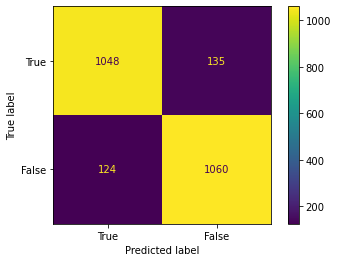

In [81]:
print("------------CONFUSION MATRIX FOR TRAINING DATA-------------")
cm=confusion_matrix(y_train,y_train_pred_clf_DT_new)
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['True','False'])
cm_display.plot()
plt.show()

print("------------CONFUSION MATRIX FOR TESTING DATA-------------")
cm=confusion_matrix(y_test,y_test_pred_clf_DT_new)
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['True','False'])
cm_display.plot()
plt.show()

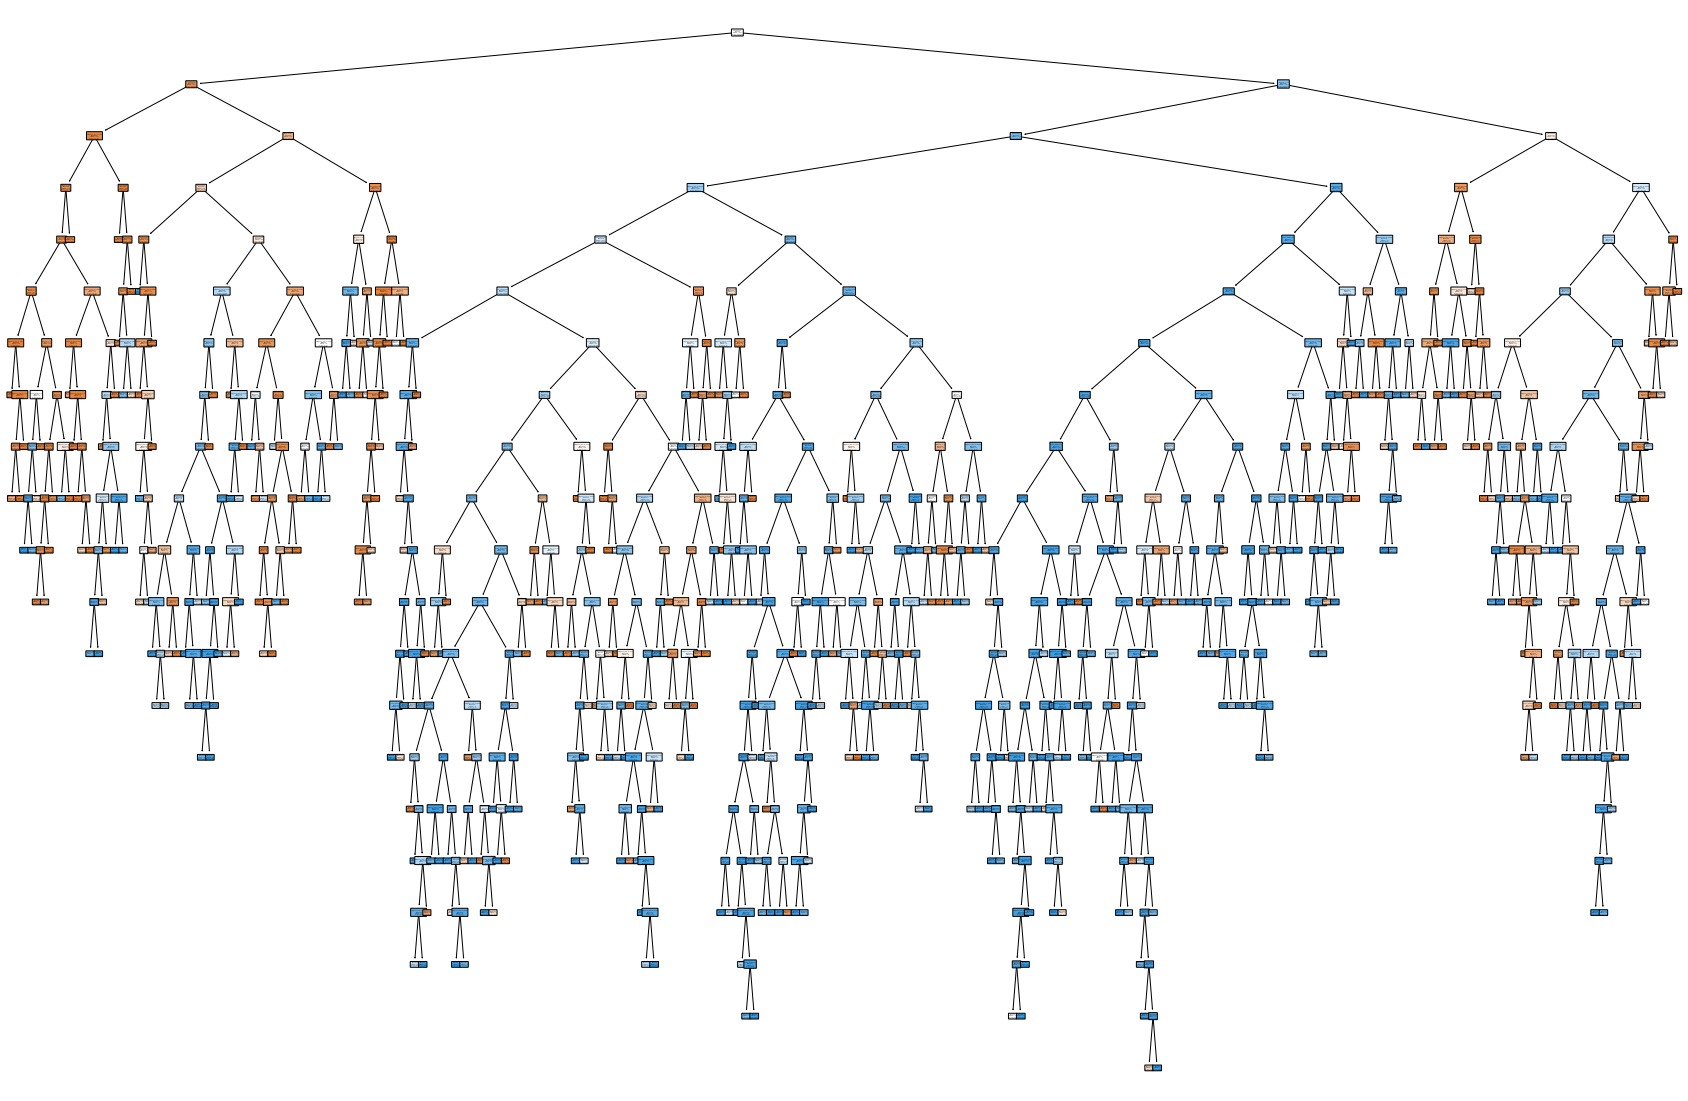

In [82]:
from sklearn.tree import plot_tree
plt.figure(figsize=(30,20))
plot_tree(clf_DT_new,filled=True,rounded=True,class_names=["No BS"," Yes BS"],feature_names=x_train.columns)
plt.show()

## K Nearest Neighbour Classifier

In [83]:
from sklearn.neighbors import KNeighborsClassifier
clf_knn=KNeighborsClassifier(n_neighbors=10)
clf_knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [84]:
y_test_pred_knn = clf_knn.predict(x_test)
y_train_pred_knn = clf_knn.predict(x_train)

In [85]:
print("----------------Train Data------------")
print("Accuracy Score is ", accuracy_score(y_train,y_train_pred_knn))
print("Precision Score is ", precision_score(y_train,y_train_pred_knn))
print("Recall Score is ", recall_score(y_train,y_train_pred_knn))

print("----------------Test Data------------")
print("Accuracy Score is ", accuracy_score(y_test,y_test_pred_knn))
print("Precision Score is ", precision_score(y_test,y_test_pred_knn))
print("Recall Score is ", recall_score(y_test,y_test_pred_knn))


----------------Train Data------------
Accuracy Score is  0.8984363994928863
Precision Score is  0.8432038834951456
Recall Score is  0.9788672865595942
----------------Test Data------------
Accuracy Score is  0.8800168990283058
Precision Score is  0.8237410071942446
Recall Score is  0.9670608108108109


------------CONFUSION MATRIX FOR TRAINING DATA-------------


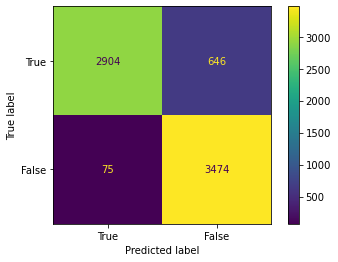

------------CONFUSION MATRIX FOR TESTING DATA-------------


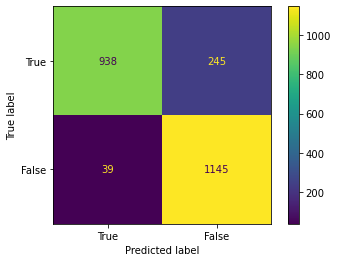

In [86]:
print("------------CONFUSION MATRIX FOR TRAINING DATA-------------")
cm=confusion_matrix(y_train,y_train_pred_knn)
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['True','False'])
cm_display.plot()
plt.show()

print("------------CONFUSION MATRIX FOR TESTING DATA-------------")
cm=confusion_matrix(y_test,y_test_pred_knn)
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['True','False'])
cm_display.plot()
plt.show()

In [87]:
from sklearn.model_selection import GridSearchCV
params={"n_neighbors":range(1,50),"weights":['uniform','distance']}
grid_search=GridSearchCV(KNeighborsClassifier(),params,cv=10)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 50),
                         'weights': ['uniform', 'distance']})

In [88]:
grid_search.best_params_

{'n_neighbors': 2, 'weights': 'uniform'}

In [89]:
params1={"n_neighbors":[2],"weights":['uniform']}
grid_search=GridSearchCV(KNeighborsClassifier(),params1,cv=10)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2], 'weights': ['uniform']})

In [90]:
y_test_pred_knncv=grid_search.predict(x_test)
y_train_pred_knncv=grid_search.predict(x_train)
print("----------------Train Data------------")
print("Accuracy Score is ", accuracy_score(y_train,y_train_pred_knncv))
print("Precision Score is ", precision_score(y_train,y_train_pred_knncv))
print("Recall Score is ", recall_score(y_train,y_train_pred_knncv))

print("----------------Test Data------------")
print("Accuracy Score is ", accuracy_score(y_test,y_test_pred_knncv))
print("Precision Score is ", precision_score(y_test,y_test_pred_knncv))
print("Recall Score is ", recall_score(y_test,y_test_pred_knncv))


----------------Train Data------------
Accuracy Score is  0.9894351317086914
Precision Score is  1.0
Recall Score is  0.9788672865595942
----------------Test Data------------
Accuracy Score is  0.9277566539923955
Precision Score is  0.9061748195669607
Recall Score is  0.9543918918918919


------------CONFUSION MATRIX FOR TRAINING DATA-------------


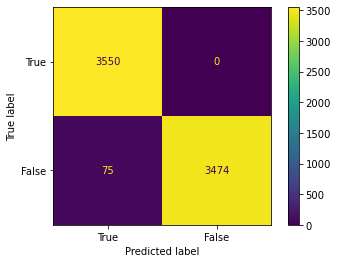

------------CONFUSION MATRIX FOR TESTING DATA-------------


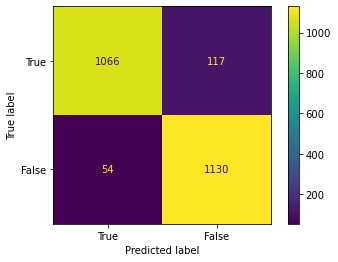

In [91]:
print("------------CONFUSION MATRIX FOR TRAINING DATA-------------")
cm=confusion_matrix(y_train,y_train_pred_knncv)
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['True','False'])
cm_display.plot()
plt.show()

print("------------CONFUSION MATRIX FOR TESTING DATA-------------")
cm=confusion_matrix(y_test,y_test_pred_knncv)
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['True','False'])
cm_display.plot()
plt.show()

## Random Forest Classifier

In [137]:
from sklearn.ensemble import RandomForestClassifier
clf_rfc=RandomForestClassifier()
params={
    'max_depth':[20,30,50],
    'min_samples_leaf':range(1,20),
    'n_estimators':range(15,20)
}
gridsearchcv=GridSearchCV(estimator=clf_rfc,param_grid=params,cv=10,scoring="accuracy")
gridsearchcv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [20, 30, 50],
                         'min_samples_leaf': range(1, 20),
                         'n_estimators': range(15, 20)},
             scoring='accuracy')

In [138]:
gridsearchcv.best_params_

{'max_depth': 30, 'min_samples_leaf': 1, 'n_estimators': 15}

In [139]:
params2={
    'max_depth':[20,25,30],
    'min_samples_leaf':range(1,20),
    'n_estimators':range(15,25)
}
gridsearchcv=GridSearchCV(estimator=clf_rfc,param_grid=params2,cv=10,scoring="accuracy")
gridsearchcv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [20, 25, 30],
                         'min_samples_leaf': range(1, 20),
                         'n_estimators': range(15, 25)},
             scoring='accuracy')

In [140]:
gridsearchcv.best_params_

{'max_depth': 30, 'min_samples_leaf': 1, 'n_estimators': 18}

In [ ]:
# params3={
#     'max_depth':[10,20],
#     'min_samples_leaf':range(1,20),
#     'n_estimators':range(10,20)
# }
# gridsearchcv=GridSearchCV(estimator=clf_rfc,param_grid=params3,cv=10,scoring="accuracy")
# gridsearchcv.fit(x_train,y_train)

In [ ]:
# gridsearchcv.best_params_

In [ ]:
# params4={
#     'max_depth':[10],
#     'min_samples_leaf':range(1,20),
#     'n_estimators':range(1,15)
# }
# gridsearchcv=GridSearchCV(estimator=clf_rfc,param_grid=params4,cv=10,scoring="accuracy")
# gridsearchcv.fit(x_train,y_train)

In [ ]:
# gridsearchcv.best_params_

In [141]:
paramsfinal={
    'max_depth':[30],
    'min_samples_leaf':[1],
    'n_estimators':[18]
}
gridsearchcv=GridSearchCV(estimator=clf_rfc,param_grid=paramsfinal,cv=10,scoring="accuracy")
gridsearchcv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [30], 'min_samples_leaf': [1],
                         'n_estimators': [18]},
             scoring='accuracy')

In [142]:
y_test_pred_rfccv=gridsearchcv.predict(x_test)
y_train_pred_rfccv=gridsearchcv.predict(x_train)

In [143]:
print("----------------Train Data------------")
print("Accuracy Score is ", accuracy_score(y_train,y_train_pred_rfccv))
print("Precision Score is ", precision_score(y_train,y_train_pred_rfccv))
print("Recall Score is ", recall_score(y_train,y_train_pred_rfccv))

print("----------------Test Data------------")
print("Accuracy Score is ", accuracy_score(y_test,y_test_pred_rfccv))
print("Precision Score is ", precision_score(y_test,y_test_pred_rfccv))
print("Recall Score is ", recall_score(y_test,y_test_pred_rfccv))


----------------Train Data------------
Accuracy Score is  0.9992956754472461
Precision Score is  1.0
Recall Score is  0.9985911524373062
----------------Test Data------------
Accuracy Score is  0.9286016054076891
Precision Score is  0.9163248564397046
Recall Score is  0.9434121621621622


------------CONFUSION MATRIX FOR TRAINING DATA-------------


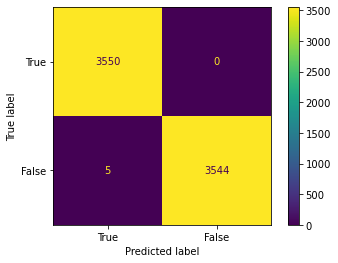

------------CONFUSION MATRIX FOR TESTING DATA-------------


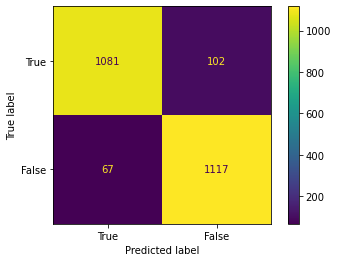

In [144]:
print("------------CONFUSION MATRIX FOR TRAINING DATA-------------")
cm=confusion_matrix(y_train,y_train_pred_rfccv)
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['True','False'])
cm_display.plot()
plt.show()

print("------------CONFUSION MATRIX FOR TESTING DATA-------------")
cm=confusion_matrix(y_test,y_test_pred_rfccv)
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['True','False'])
cm_display.plot()
plt.show()

## Naive Bayes

In [92]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(x_train,y_train)

GaussianNB()

In [93]:
y_test_pred_NB = naive_bayes.predict(x_test)
y_train_pred_NB = naive_bayes.predict(x_train)

In [94]:
print("----------------Train Data------------")
print("Accuracy Score is ", accuracy_score(y_train,y_train_pred_NB))
print("Precision Score is ", precision_score(y_train,y_train_pred_NB))
print("Recall Score is ", recall_score(y_train,y_train_pred_NB))

print("----------------Test Data------------")
print("Accuracy Score is ", accuracy_score(y_test,y_test_pred_NB))
print("Precision Score is ", precision_score(y_test,y_test_pred_NB))
print("Recall Score is ", recall_score(y_test,y_test_pred_NB))


----------------Train Data------------
Accuracy Score is  0.7888434990843781
Precision Score is  0.75
Recall Score is  0.8664412510566357
----------------Test Data------------
Accuracy Score is  0.7820025348542459
Precision Score is  0.7437956204379562
Recall Score is  0.8606418918918919


------------CONFUSION MATRIX FOR TRAINING DATA-------------


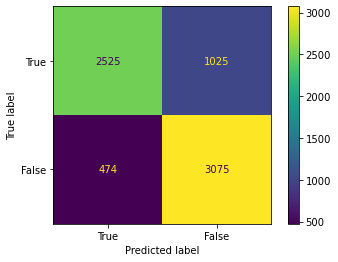

------------CONFUSION MATRIX FOR TESTING DATA-------------


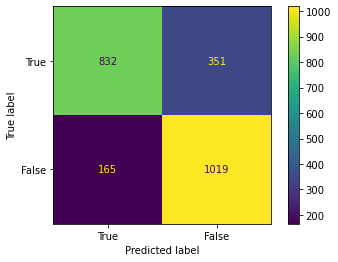

In [95]:
print("------------CONFUSION MATRIX FOR TRAINING DATA-------------")
cm=confusion_matrix(y_train,y_train_pred_NB)
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['True','False'])
cm_display.plot()
plt.show()

print("------------CONFUSION MATRIX FOR TESTING DATA-------------")
cm=confusion_matrix(y_test,y_test_pred_NB)
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['True','False'])
cm_display.plot()
plt.show()

## Support Vector Machine Classifier

In [96]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)

SVC()

In [97]:
y_test_pred_svc=svc.predict(x_test)
y_train_pred_svc=svc.predict(x_train)

In [98]:
print("----------------Train Data------------")
print("Accuracy Score is ", accuracy_score(y_train,y_train_pred_svc))
print("Precision Score is ", precision_score(y_train,y_train_pred_svc))
print("Recall Score is ", recall_score(y_train,y_train_pred_svc))

print("----------------Test Data------------")
print("Accuracy Score is ", accuracy_score(y_test,y_test_pred_svc))
print("Precision Score is ", precision_score(y_test,y_test_pred_svc))
print("Recall Score is ", recall_score(y_test,y_test_pred_svc))


----------------Train Data------------
Accuracy Score is  0.7706719256233272
Precision Score is  0.7424892703862661
Recall Score is  0.8286841363764441
----------------Test Data------------
Accuracy Score is  0.7553865652724968
Precision Score is  0.7368833202819107
Recall Score is  0.7947635135135135


------------CONFUSION MATRIX FOR TRAINING DATA-------------


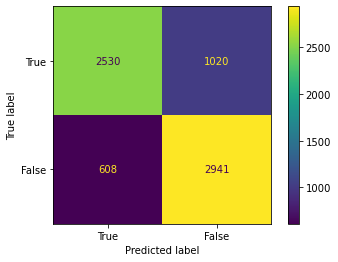

------------CONFUSION MATRIX FOR TESTING DATA-------------


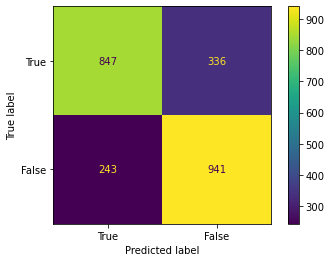

In [99]:
print("------------CONFUSION MATRIX FOR TRAINING DATA-------------")
cm=confusion_matrix(y_train,y_train_pred_svc)
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['True','False'])
cm_display.plot()
plt.show()

print("------------CONFUSION MATRIX FOR TESTING DATA-------------")
cm=confusion_matrix(y_test,y_test_pred_svc)
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['True','False'])
cm_display.plot()
plt.show()

In [100]:
# defining parameter range 
from sklearn.model_selection import GridSearchCV
params1 = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']} 

grid = GridSearchCV(svc, params1, refit = True, verbose = 3) 

# fitting the model for grid search 
grid.fit(x_train, y_train) 


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.501 total time=   7.4s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.504 total time=   7.1s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.500 total time=   7.6s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.501 total time=   7.6s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.542 total time=   7.5s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.834 total time=   5.7s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.839 total time=   5.8s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.810 total time=   5.7s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.835 total time=   6.2s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.829 total time=   6.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.829 total time=   2.9s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.893 total time=   8.2s
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.886 total time=   8.3s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.893 total time=   8.0s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.893 total time=   8.2s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.953 total time=   5.8s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.944 total time=   6.1s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.947 total time=   5.8s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.935 total time=   5.1s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.947 total time=   6.5s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.944 total time=   5.1s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.923 total time=   4.5s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.939 total time=   4.7s
[CV 4/5] END ....C=1000, gam

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [101]:
grid.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

In [102]:
finalsvc=grid.best_estimator_

In [103]:
finalsvc.fit(x_train,y_train)

SVC(C=10, gamma=0.1)

In [104]:
y_test_pred_fsvc=finalsvc.predict(x_test)
y_train_pred_fsvc=finalsvc.predict(x_train)

In [105]:
print("----------------Train Data------------")
print("Accuracy Score is ", accuracy_score(y_train,y_train_pred_fsvc))
print("Precision Score is ", precision_score(y_train,y_train_pred_fsvc))
print("Recall Score is ", recall_score(y_train,y_train_pred_fsvc))

print("----------------Test Data------------")
print("Accuracy Score is ", accuracy_score(y_test,y_test_pred_fsvc))
print("Precision Score is ", precision_score(y_test,y_test_pred_fsvc))
print("Recall Score is ", recall_score(y_test,y_test_pred_fsvc))


----------------Train Data------------
Accuracy Score is  0.9990139456261445
Precision Score is  0.9983117613956106
Recall Score is  0.9997182304874612
----------------Test Data------------
Accuracy Score is  0.9505703422053232
Precision Score is  0.9319838056680162
Recall Score is  0.9721283783783784


------------CONFUSION MATRIX FOR TRAINING DATA-------------


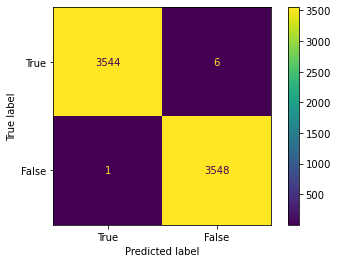

------------CONFUSION MATRIX FOR TESTING DATA-------------


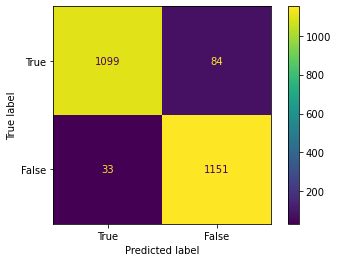

In [106]:
print("------------CONFUSION MATRIX FOR TRAINING DATA-------------")
cm=confusion_matrix(y_train,y_train_pred_fsvc)
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['True','False'])
cm_display.plot()
plt.show()

print("------------CONFUSION MATRIX FOR TESTING DATA-------------")
cm=confusion_matrix(y_test,y_test_pred_fsvc)
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['True','False'])
cm_display.plot()
plt.show()

## XGBoost 

In [107]:
import xgboost as xgb
clf_xgb = xgb.XGBClassifier(objective='binary:logistic',
                            eval_metric="logloss", ## this avoids a warning...
                            seed=44,
                            use_label_encoder=False)
clf_xgb.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=6,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=44,
              reg_alpha=0, reg_lambda=1, ...)

In [108]:
y_test_pred_xgb=clf_xgb.predict(x_test)
y_train_pred_xgb=clf_xgb.predict(x_train)

In [109]:
print("----------------Train Data------------")
print("Accuracy Score is ", accuracy_score(y_train,y_train_pred_xgb))
print("Precision Score is ", precision_score(y_train,y_train_pred_xgb))
print("Recall Score is ", recall_score(y_train,y_train_pred_xgb))

print("----------------Test Data------------")
print("Accuracy Score is ", accuracy_score(y_test,y_test_pred_xgb))
print("Precision Score is ", precision_score(y_test,y_test_pred_xgb))
print("Recall Score is ", recall_score(y_test,y_test_pred_xgb))


----------------Train Data------------
Accuracy Score is  0.9939428088463164
Precision Score is  0.9963193657984145
Recall Score is  0.9915469146238377
----------------Test Data------------
Accuracy Score is  0.9581749049429658
Precision Score is  0.9539748953974896
Recall Score is  0.9628378378378378


------------CONFUSION MATRIX FOR TRAINING DATA-------------


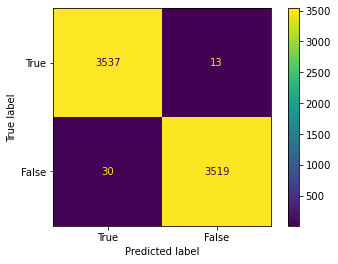

------------CONFUSION MATRIX FOR TESTING DATA-------------


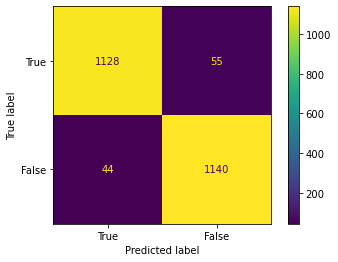

In [110]:
print("------------CONFUSION MATRIX FOR TRAINING DATA-------------")
cm=confusion_matrix(y_train,y_train_pred_xgb)
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['True','False'])
cm_display.plot()
plt.show()

print("------------CONFUSION MATRIX FOR TESTING DATA-------------")
cm=confusion_matrix(y_test,y_test_pred_xgb)
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['True','False'])
cm_display.plot()
plt.show()

In [111]:
params = {'max_depth': [4, 5, 6],'learning_rate': [0.1, 0.01, 0.05],
              'gamma': [0, 0.25, 1.0],'reg_lambda': [0, 1.0, 10.0],
              'scale_pos_weight': [1, 3, 5]}
#n_estimators; default is 100 (no. of boosting rounds), subsample, colsample_bytree

grid_search = GridSearchCV(estimator=xgb.XGBClassifier(objective='binary:logistic',seed=42,
                                                          subsample=0.9,colsample_bytree=0.5,
                                                          use_label_encoder=False),param_grid=params,
                              scoring='roc_auc', verbose=0,cv = 3)

grid_search.fit(x_train,y_train,early_stopping_rounds=10,eval_metric='auc',eval_set=[(x_test, y_test)],verbose=False)

E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\s

E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\s

E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\s

E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\s

E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\s

E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\s

E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\s

E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\s

E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\s

E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\s

E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\s

E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\s

E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\s

E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\s

E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\s

E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\s

E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\s

E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\s

E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\s

E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\s

E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\s

E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\s

E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\s

E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\s

E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\s

E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\s

E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\s

E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\s

E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\s

E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\s

E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\s

E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\s

E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\s

E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\s

E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\s

E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\s

E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\s

E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\s

E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\s

E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\s

E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\s

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.5,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, ...),
             param_grid={'gamma': [0, 0.25, 1.0],
                         'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': [4, 5, 6], 'reg_lambda': [0, 1.0, 10.0],
                         'scale_pos_weight': [1, 3, 5]},
             scoring='roc_auc')

In [112]:
best_xgb_1=grid_search.best_estimator_

In [113]:
best_xgb_1.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=1.0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=0, ...)

In [114]:
y_test_pred_xgb1=best_xgb_1.predict(x_test)
y_train_pred_xgb1=best_xgb_1.predict(x_train)

In [115]:
print("----------------Train Data------------")
print("Accuracy Score is ", accuracy_score(y_train,y_train_pred_xgb1))
print("Precision Score is ", precision_score(y_train,y_train_pred_xgb1))
print("Recall Score is ", recall_score(y_train,y_train_pred_xgb1))

print("----------------Test Data------------")
print("Accuracy Score is ", accuracy_score(y_test,y_test_pred_xgb1))
print("Precision Score is ", precision_score(y_test,y_test_pred_xgb1))
print("Recall Score is ", recall_score(y_test,y_test_pred_xgb1))


----------------Train Data------------
Accuracy Score is  0.92252429919707
Precision Score is  0.8659995118379302
Recall Score is  0.9997182304874612
----------------Test Data------------
Accuracy Score is  0.8893113645965357
Precision Score is  0.8302292263610315
Recall Score is  0.9788851351351351


In [116]:
best_xgb_1.scale_pos_weight

5

In [117]:
params_3 = {
    'max_depth': [6,10,20],
    'learning_rate': [0.1, 0.5, 1],
    'gamma': [1.0,1.5,2.0],
    'reg_lambda': [10.0, 20, 100],
     'scale_pos_weight': [1]
}
grid_search = GridSearchCV(estimator=xgb.XGBClassifier(objective='binary:logistic',seed=42,
                                                          subsample=0.9,colsample_bytree=0.5,
                                                          use_label_encoder=False),param_grid=params_3,
                              scoring='roc_auc', verbose=0,cv = 3)

grid_search.fit(x_train,y_train,early_stopping_rounds=10,eval_metric='auc',eval_set=[(x_test, y_test)],verbose=False)

E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\s

E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\s

E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\s

E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\s

E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\s

E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\s

E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\s

E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\s

E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\s

E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\s

E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\s

E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\s

E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\s

E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\s

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.5,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, ...),
             param_grid={'gamma': [1.0, 1.5, 2.0],
                         'learning_rate': [0.1, 0.5, 1],
                         'max_depth': [6, 10, 20],
                         'reg_lambda': [10.0, 20, 100],
                         'scale_pos_weight': [1]},
             scoring='roc_auc')

In [118]:
best_xgb_2=grid_search.best_estimator_

In [119]:
best_xgb_2.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=1.0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.5, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=20, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=10.0, ...)

In [120]:
y_test_pred_xgb2=best_xgb_2.predict(x_test)
y_train_pred_xgb2=best_xgb_2.predict(x_train)

In [121]:
best_xgb_2.max_depth

20

In [122]:
best_xgb_2.scale_pos_weight

1

In [123]:
params_final = {
    'max_depth': [20],
    'learning_rate': [0.5],
    'gamma': [1.0],
    'reg_lambda': [10.0],
     'scale_pos_weight': [1]
}
grid_search = GridSearchCV(estimator=xgb.XGBClassifier(objective='binary:logistic',seed=42,
                                                          subsample=0.9,colsample_bytree=0.5,
                                                          use_label_encoder=False),param_grid=params_final,
                              scoring='roc_auc', verbose=0,cv = 3)

grid_search.fit(x_train,y_train,early_stopping_rounds=10,eval_metric='auc',eval_set=[(x_test, y_test)],verbose=False)

E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
E:\anaconda3\lib\site-packages\xgboost\s

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.5,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, ...),
             param_grid={'gamma': [1.0], 'learning_rate': [0.5],
                         'max_depth': [20], 'reg_lambda': [10.0],
                         'scale_pos_weight': [1]},
             scoring='roc_auc')

In [124]:
best_xgb_final=grid_search.best_estimator_

In [125]:
best_xgb_final.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=1.0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.5, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=20, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=10.0, ...)

In [126]:
y_test_pred_xgbf=best_xgb_final.predict(x_test)
y_train_pred_xgbf=best_xgb_final.predict(x_train)

In [127]:
print("----------------Train Data------------")
print("Accuracy Score is ", accuracy_score(y_train,y_train_pred_xgbf))
print("Precision Score is ", precision_score(y_train,y_train_pred_xgbf))
print("Recall Score is ", recall_score(y_train,y_train_pred_xgbf))

print("----------------Test Data------------")
print("Accuracy Score is ", accuracy_score(y_test,y_test_pred_xgbf))
print("Precision Score is ", precision_score(y_test,y_test_pred_xgbf))
print("Recall Score is ", recall_score(y_test,y_test_pred_xgbf))


----------------Train Data------------
Accuracy Score is  0.9888716720664882
Precision Score is  0.9917800453514739
Recall Score is  0.9859115243730628
----------------Test Data------------
Accuracy Score is  0.9455006337135615
Precision Score is  0.9414225941422594
Recall Score is  0.950168918918919


------------CONFUSION MATRIX FOR TRAINING DATA-------------


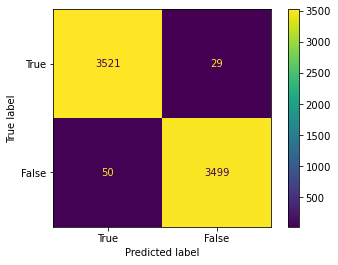

------------CONFUSION MATRIX FOR TESTING DATA-------------


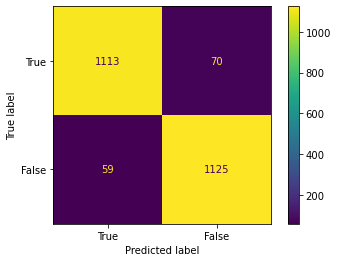

In [128]:
print("------------CONFUSION MATRIX FOR TRAINING DATA-------------")
cm=confusion_matrix(y_train,y_train_pred_xgbf)
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['True','False'])
cm_display.plot()
plt.show()

print("------------CONFUSION MATRIX FOR TESTING DATA-------------")
cm=confusion_matrix(y_test,y_test_pred_xgbf)
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['True','False'])
cm_display.plot()
plt.show()

In [129]:
# mse=mean_squared_error(y_train,y_train_pred)
# rmse=sqrt(mse)
# r2score=r2_score(y_train,y_train_pred)
# print("------------Train data------------------")
# print("MSE for training: ",mse)
# print("RMSE for training: ",rmse)
# print("r2 Score for training: ",r2score)
# mse=mean_squared_error(y_test,y_test_pred)
# rmse=sqrt(mse)
# r2score=r2_score(y_test,y_test_pred)
# print("------------Test data------------------")
# print("MSE for testing: ",mse)
# print("RMSE for testing: ",rmse)
# print("r2 Score for testing: ",r2score)


# print("------------------Training Data------------------")
# print("MSE: ",mean_squared_error(y_train_pred_ridgecv,y_train))
# print("MSE: ",sqrt(mean_squared_error(y_train_pred_ridgecv,y_train)))
# print("R2 score: ",r2_score(y_train,y_train_pred_ridgecv))
# print("---------------- -Testing Data-------------------")
# print("MSE: ",mean_squared_error(y_test_pred_ridgecv,y_test))
# print("MSE: ",sqrt(mean_squared_error(y_test_pred_ridgecv,y_test)))
# print("R2 score: ",r2_score(y_test,y_test_pred_ridgecv))


## Training Data Outcome

In [130]:
models=['Logistic Regression','Decision Tree Classifier',
        'K Nearest Neighbor', 'Naive Bayes','SVC','XGBoost']

accuracy=[accuracy_score(y_train,y_train_pred_log_reg),
          accuracy_score(y_train,y_train_pred_clf_DT_new),
          accuracy_score(y_train,y_train_pred_knncv),
#           accuracy_score(y_train,y_train_pred_rfccv),
          accuracy_score(y_train,y_train_pred_NB),
          accuracy_score(y_train,y_train_pred_fsvc),
          accuracy_score(y_train,y_train_pred_xgbf)]

precision=[precision_score(y_train,y_train_pred_log_reg),
           precision_score(y_train,y_train_pred_clf_DT_new),
           precision_score(y_train,y_train_pred_knncv),
#            precision_score(y_train,y_train_pred_rfccv),
           precision_score(y_train,y_train_pred_NB),
           precision_score(y_train,y_train_pred_fsvc),
           precision_score(y_train,y_train_pred_xgbf)]

recall=[recall_score(y_train,y_train_pred_log_reg),
        recall_score(y_train,y_train_pred_clf_DT_new) ,
        recall_score(y_train,y_train_pred_knncv),
#         recall_score(y_train,y_train_pred_rfccv),
        recall_score(y_train,y_train_pred_NB),
        recall_score(y_train,y_train_pred_fsvc),
        recall_score(y_train,y_train_pred_xgbf)]

model_list1=list(zip(models,accuracy,precision,recall))
print("________________________Training Data Outcome____________________________")
train_outcomedf=pd.DataFrame(model_list1,columns=['ModelName','Accuracy','Precision','Recall'])
train_outcomedf

________________________Training Data Outcome____________________________


,ModelName,Accuracy,Precision,Recall
0,Logistic Regression,0.811523,0.799350,0.831784
1,Decision Tree Classifier,0.944922,0.946045,0.943646
2,K Nearest Neighbor,0.989435,1.000000,0.978867
3,Naive Bayes,0.788843,0.750000,0.866441
4,SVC,0.999014,0.998312,0.999718
5,XGBoost,0.988872,0.991780,0.985912


## Testing Data Outcome

In [131]:
models=['Logistic Regression','Decision Tree Classifier',
        'K Nearest Neighbor', 'Naive Bayes','SVC','XGBoost']

accuracy=[accuracy_score(y_test,y_test_pred_log_reg),
          accuracy_score(y_test,y_test_pred_clf_DT_new),
          accuracy_score(y_test,y_test_pred_knncv),
#           accuracy_score(y_test,y_test_pred_rfccv),
          accuracy_score(y_test,y_test_pred_NB),
          accuracy_score(y_test,y_test_pred_fsvc),
          accuracy_score(y_test,y_test_pred_xgbf)]

precision=[precision_score(y_test,y_test_pred_log_reg),
           precision_score(y_test,y_test_pred_clf_DT_new),
           precision_score(y_test,y_test_pred_knncv),
#            precision_score(y_test,y_test_pred_rfccv),
           precision_score(y_test,y_test_pred_NB),
           precision_score(y_test,y_test_pred_fsvc),
           precision_score(y_test,y_test_pred_xgbf)]

recall=[recall_score(y_test,y_test_pred_log_reg),
        recall_score(y_test,y_test_pred_clf_DT_new),
        recall_score(y_test,y_test_pred_knncv),
#         recall_score(y_test,y_test_pred_rfccv),
        recall_score(y_test,y_test_pred_NB),
        recall_score(y_test,y_test_pred_fsvc),
        recall_score(y_test,y_test_pred_xgbf)]

model_list2=list(zip(models,accuracy,precision,recall))
print("________________________Testing Data Outcome____________________________")
test_outcomedf=pd.DataFrame(model_list2,columns=['ModelName','Accuracy','Precision','Recall'])
test_outcomedf

________________________Testing Data Outcome____________________________


,ModelName,Accuracy,Precision,Recall
0,Logistic Regression,0.802281,0.789176,0.825169
1,Decision Tree Classifier,0.890579,0.887029,0.895270
2,K Nearest Neighbor,0.927757,0.906175,0.954392
3,Naive Bayes,0.782003,0.743796,0.860642
4,SVC,0.950570,0.931984,0.972128
5,XGBoost,0.945501,0.941423,0.950169


### Here max accuracy is in Support Vector classifier i.e 0.993 for Training Data and 0.951 for Testing Data

In [132]:
input_data =   (0,56,0,0,1,1,0,246,34,2)
input_data_array = np.asarray(input_data)
reshape_data = input_data_array.reshape(1,-1)
prediction=finalsvc.predict(reshape_data)
print(prediction)
if(prediction[0]==1):
    print("The person has brain stroke")
else:
    print("The person does not has brain stroke")

[1]
The person has brain stroke


E:\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [133]:
import pickle

In [134]:
filename = "trained_model.sav"
pickle.dump(finalsvc,open(filename,'wb'))

In [135]:
loaded_model=pickle.load(open('trained_model.sav','rb'))

In [145]:
input_data =   (0,56,0,0,1,1,0,246,34,2)
input_data_array = np.asarray(input_data)
reshape_data = input_data_array.reshape(1,-1)
prediction=loaded_model.predict(reshape_data)
print(prediction)
if(prediction[0]==1):
    print("The person has brain stroke")
else:
    print("The person does not has brain stroke")

[1]
The person has brain stroke


E:\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [146]:
# bkhb

In [147]:
#bklh